In [45]:
import pandas as pd

#This is to import the csv file into a pandas dataframe
df = pd.read_csv('C:/JupyterNotebook/yahoo_stock.csv')

In [46]:
#This is to identify missing values. Having zeros indicate that there are no missing values
print(df.isnull().sum())

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [47]:
#This is to inspect data types
print(df.dtypes)

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


In [48]:
#This is to Convert the 'Date' Column to Datetime Format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [49]:
print(df.dtypes)

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object


In [50]:
import matplotlib.pyplot as plt

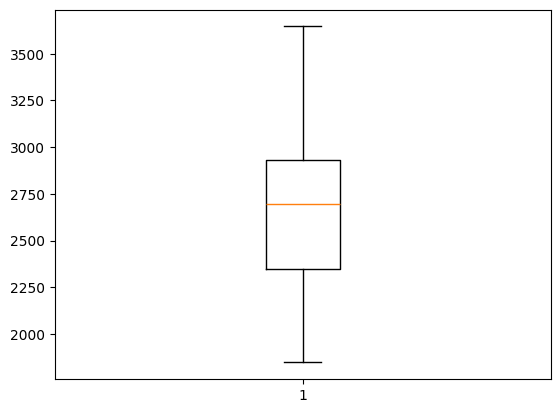

In [51]:
#Check for Outliers:
#Visual Inspection: Using box plots or scatter plots to identify outliers.

plt.boxplot(df['High'])
plt.show()

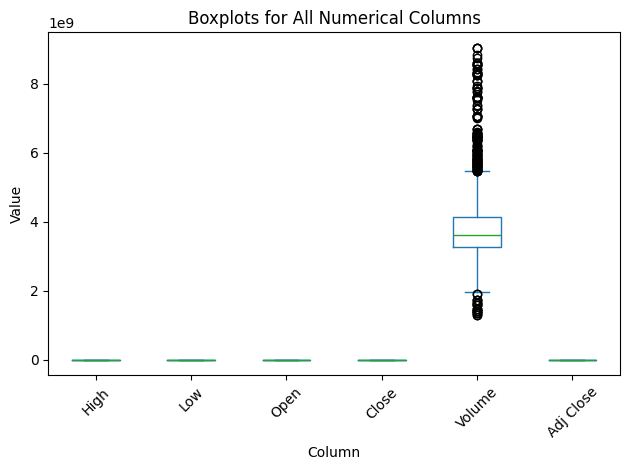

In [52]:
#Check for Outliers:
#1.Visual Inspection: Use box plots or scatter plots to identify outliers.

df.plot(kind='box')  # Use 'box' for boxplots
plt.title('Boxplots for All Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate column names for readability
plt.tight_layout()

plt.show()

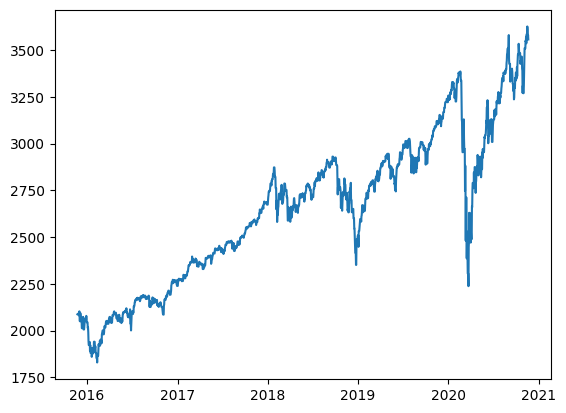

In [53]:
plt.plot(df['Date'], df['Close'])

In [60]:
#Check for Outliers:
#2.Statistical Methods: Using Z-score to detect outliers.

z_scores = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()
outliers = df[abs(z_scores) > 3]

In [61]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [62]:
duplicates = df.duplicated(subset=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
print(duplicates.sum())

0


In [67]:
# Checking for range inconsistencies
print(df[df['Low'] < 0])  # For negative values

Empty DataFrame
Columns: [Date, High, Low, Open, Close, Volume, Adj Close]
Index: []


In [68]:
# Basic statistics
print(df.describe())

                      Date         High          Low         Open  \
count                 1825  1825.000000  1825.000000  1825.000000   
mean   2018-05-23 00:00:00  2660.718673  2632.817580  2647.704751   
min    2015-11-23 00:00:00  1847.000000  1810.099976  1833.400024   
25%    2017-02-21 00:00:00  2348.350098  2322.250000  2341.979980   
50%    2018-05-23 00:00:00  2696.250000  2667.840088  2685.489990   
75%    2019-08-22 00:00:00  2930.790039  2900.709961  2913.860107   
max    2020-11-20 00:00:00  3645.989990  3600.159912  3612.090088   
std                    NaN   409.680853   404.310068   407.169994   

             Close        Volume    Adj Close  
count  1825.000000  1.825000e+03  1825.000000  
mean   2647.856284  3.869627e+09  2647.856284  
min    1829.079956  1.296540e+09  1829.079956  
25%    2328.949951  3.257950e+09  2328.949951  
50%    2683.340088  3.609740e+09  2683.340088  
75%    2917.520020  4.142850e+09  2917.520020  
max    3626.909912  9.044690e+09  3626.909

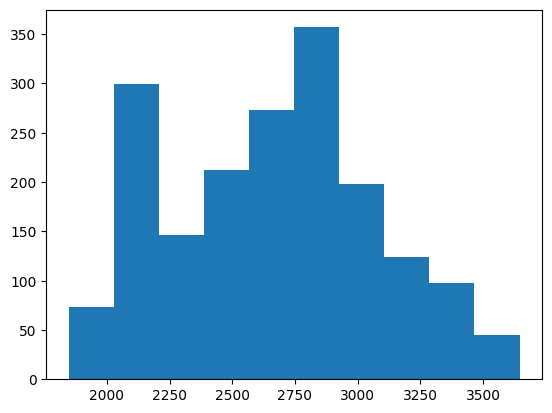

In [73]:
# Visualize data distributions
plt.hist(df['High'])
plt.show()

In [78]:
import seaborn as sns

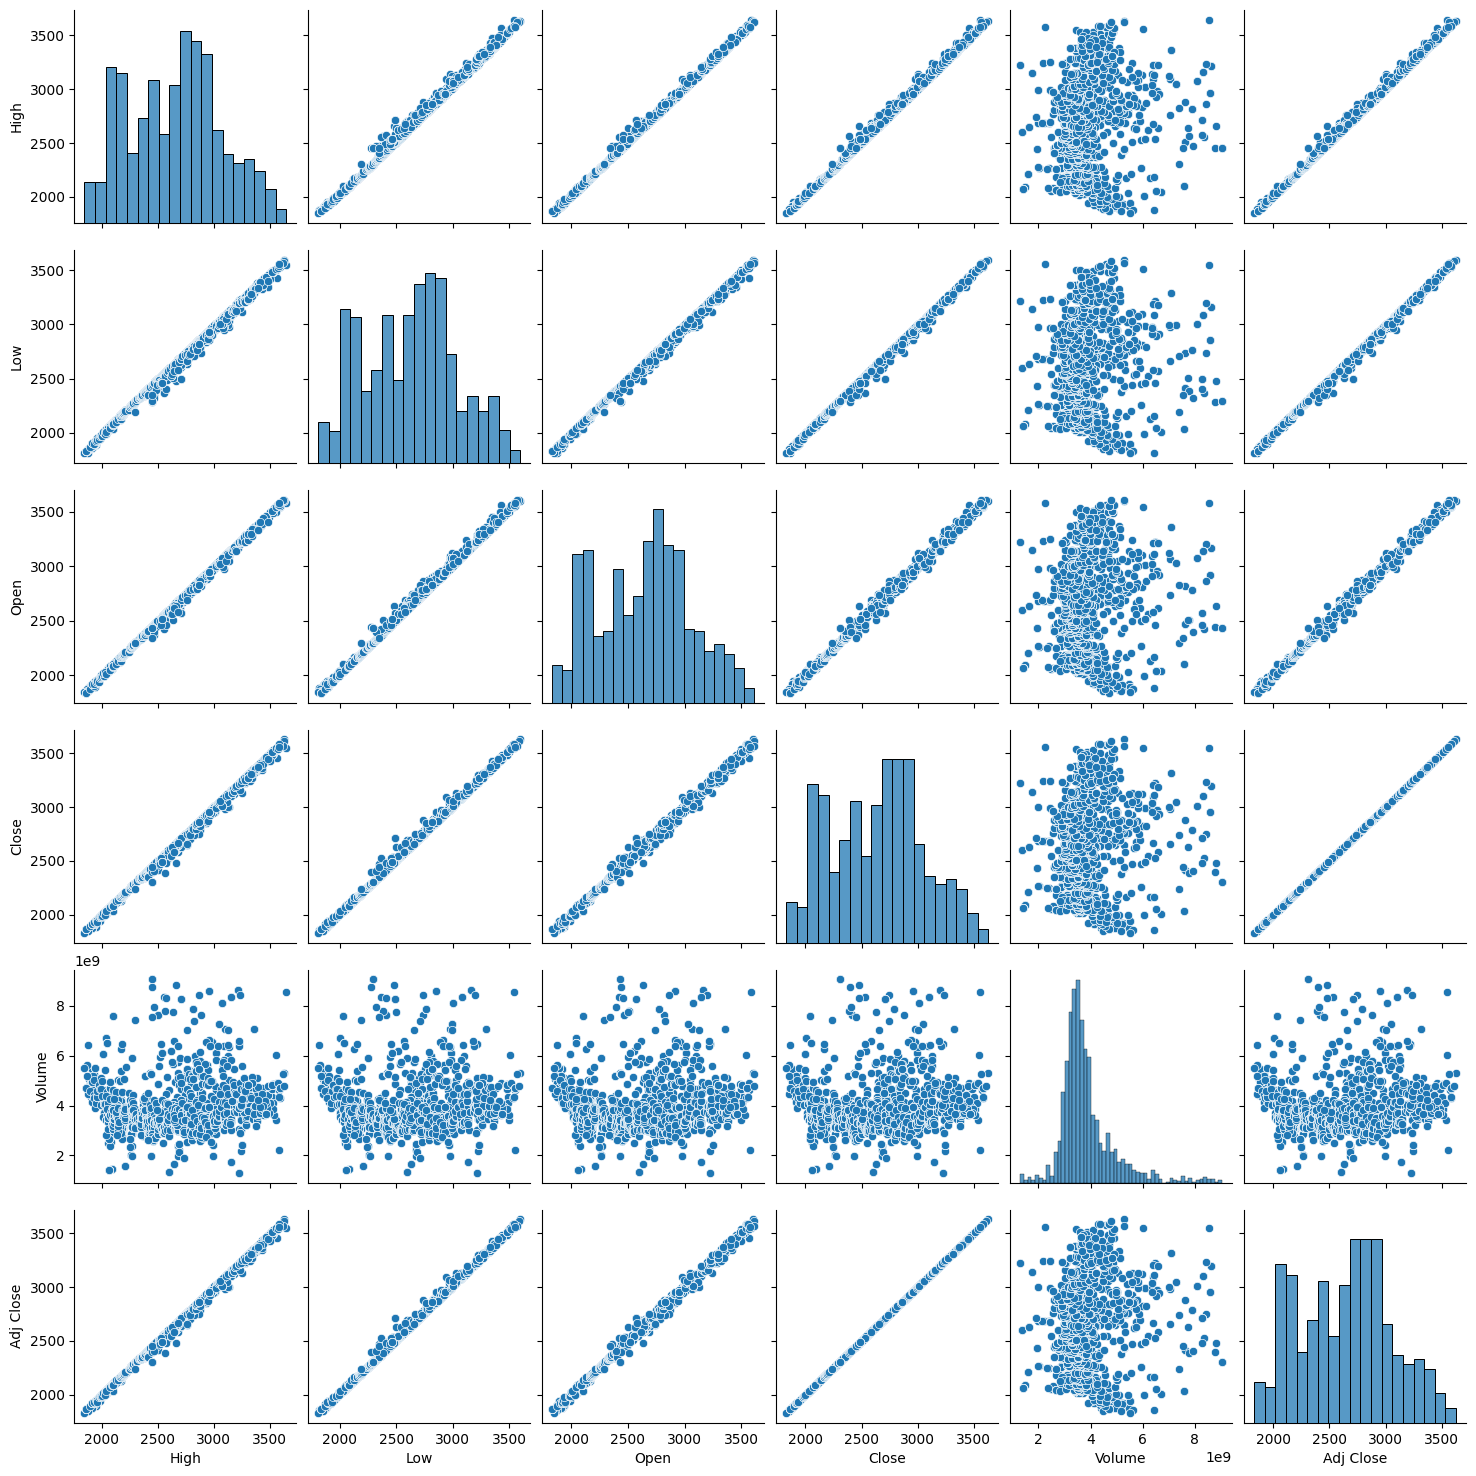

In [79]:
# Visualize relationships between variables
sns.pairplot(df)
plt.show()

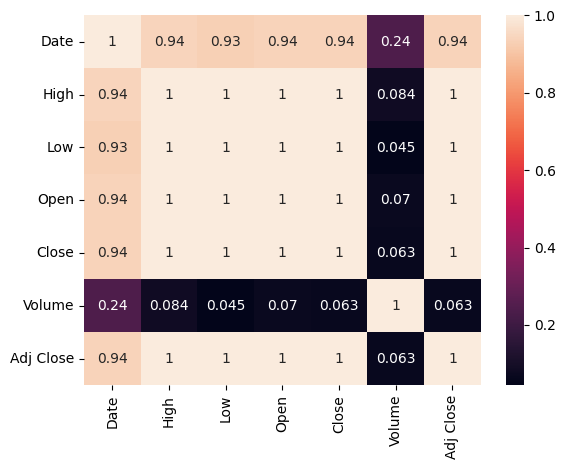

In [80]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()